In [1]:
import pandas as pd



def load_and_compare(csv_path1, csv_path2, csv_path3):
    try:
        # Cargar los CSV
        df1 = pd.read_csv(csv_path1)
        df2 = pd.read_csv(csv_path2)
        df3 = pd.read_csv(csv_path3)

        # Asumiendo que la primera columna es el 'nombre del archivo'
        # y la segunda la 'clasificación', unir los DataFrames en base al nombre del archivo
        merged_df = pd.merge(df1, df2, on=df1.columns[0], suffixes=('_model1', '_model2'))
        merged_df = pd.merge(merged_df, df3, on=merged_df.columns[0])

        # Función para determinar la clase común o la más frecuente
        def common_or_frequent_class(row):
            classes = [row['class_model1'], row['class_model2'], row['class_model3']]
            if classes.count(classes[0]) == 3:
                return classes[0]  # Todos iguales
            return max(set(classes), key=classes.count)  # La más común

        # Función para determinar la clase común o la más frecuente
        def common_class(row):
            classes = [row['class_model1'], row['class_model2'], row['class_model3']]
            if classes.count(classes[0]) == 3:
                return classes[0]  # Todos iguales
            else:
                return 'None'  # La más común
            
        # Renombrar columnas para claridad
        merged_df.columns = ['file_name', 'class_model1', 'class_model2', 'class_model3']

        # Crear una nueva columna con las clasificaciones en una tupla
        merged_df['class_tuple'] = list(zip(merged_df['class_model1'], 
                                            merged_df['class_model2'], 
                                            merged_df['class_model3']))
        merged_df['common_or_frequent'] = merged_df.apply(common_or_frequent_class, axis=1)
        
        merged_df['common'] = merged_df.apply(common_class, axis=1)
        
        return merged_df

    except Exception as e:
        return str(e)
        

# Placeholder paths for the CSV files
csv_path1 = './EQUIPO_MESSI_variante_CONTIDO_ETIQUETAS.csv'
csv_path2 = './EQUIPO_MESSI_variante_SEN_PREPROCESAMENTO.csv'
csv_path3 = './Alpaca_variante_chatgpt.csv'

# Loading the CSV files into Pandas DataFrames
try:
    df1 = pd.read_csv(csv_path1)
    df2 = pd.read_csv(csv_path2)
    df3 = pd.read_csv(csv_path3)
    loaded = True
except Exception as e:
    error_message = str(e)
    loaded = False

loaded, error_message if not loaded else (df1.head(), df2.head(), df3.head())


(True,
 (     docid predicted_class
  0   wfqwne         student
  1  wwisnmd           other
  2  xlhpgzu           other
  3    yghie         student
  4   omvawb           other,
       docid predicted_class
  0   wfqwne         student
  1  wwisnmd           other
  2  xlhpgzu           other
  3    yghie         student
  4   omvawb           other,
       docid predicted_class
  0  aaclkul           other
  1  aagelci           other
  2  aangjmn           other
  3   aawnpc           other
  4  abdjgiz         student))

In [2]:
# Ejemplo de uso
result = load_and_compare(csv_path1, csv_path2, csv_path3)
result

,file_name,class_model1,class_model2,class_model3,class_tuple,common_or_frequent,common
0,wfqwne,student,student,student,"(student, student, student)",student,student
1,wwisnmd,other,other,other,"(other, other, other)",other,other
2,xlhpgzu,other,other,other,"(other, other, other)",other,other
3,yghie,student,student,student,"(student, student, student)",student,student
4,omvawb,other,other,other,"(other, other, other)",other,other
...,...,...,...,...,...,...,...
1654,umhdmc,staff,staff,faculty,"(staff, staff, faculty)",staff,None
1655,pfhqfrd,course,course,course,"(course, course, course)",course,course
1656,ezpaic,other,other,other,"(other, other, other)",other,other
1657,iwwwqw,faculty,faculty,faculty,"(faculty, faculty, faculty)",faculty,faculty


In [3]:
result.to_csv('./result_comarative.csv', index=False)

In [4]:
for index, row in result.iterrows():
    print(row)

file_name                                  wfqwne
class_model1                              student
class_model2                              student
class_model3                              student
class_tuple           (student, student, student)
common_or_frequent                        student
common                                    student
Name: 0, dtype: object
file_name                           wwisnmd
class_model1                          other
class_model2                          other
class_model3                          other
class_tuple           (other, other, other)
common_or_frequent                    other
common                                other
Name: 1, dtype: object
file_name                           xlhpgzu
class_model1                          other
class_model2                          other
class_model3                          other
class_tuple           (other, other, other)
common_or_frequent                    other
common                          

In [5]:
from sklearn.metrics import confusion_matrix

# Asumiendo que las columnas de etiquetas se llaman 'true_label' y 'predicted_label'
y_true = result['common_or_frequent']
y_pred = df1['predicted_class']

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

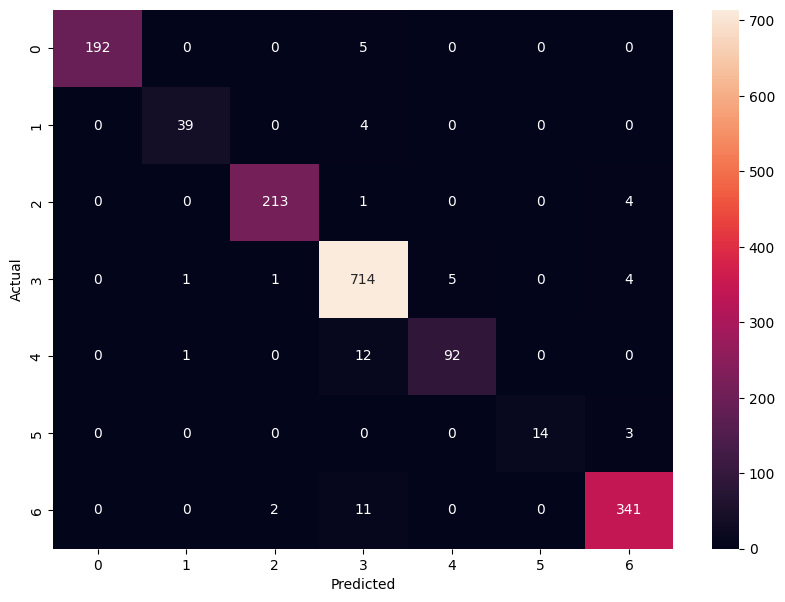

In [6]:
# Generate the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [7]:
from sklearn.metrics import precision_score
# Calcular la precisión para cada clase
precisions = precision_score(y_true, y_pred, average=None)  # None para obtener la precisión de cada clase

# Calcular la precisión media total
avg_precision = precision_score(y_true, y_pred, average='macro')  # 'macro' calcula la media sin ponderar

print("Precisión por clase:", precisions)
print("Precisión media total:", avg_precision)

Precisión por clase: [1.         0.95121951 0.98611111 0.95582329 0.94845361 1.
 0.96875   ]
Precisión media total: 0.9729082178180495


In [8]:
# Asumiendo que las columnas de etiquetas se llaman 'true_label' y 'predicted_label'
y_true = result['common_or_frequent']
y_pred = df2['predicted_class']
# Calcular la precisión para cada clase
precisions = precision_score(y_true, y_pred, average=None)  # None para obtener la precisión de cada clase

# Calcular la precisión media total
avg_precision = precision_score(y_true, y_pred, average='macro')  # 'macro' calcula la media sin ponderar

print("Precisión por clase:", precisions)
print("Precisión media total:", avg_precision)

Precisión por clase: [0.93467337 0.95454545 0.93273543 0.96751412 0.86086957 0.66666667
 0.96242775]
Precisión media total: 0.8970617641758825


Precisión por clase: [0.93564356 0.88372093 0.88738739 0.94497937 0.82828283 0.36842105
 0.89913545]
Precisión media total: 0.8210815109770557


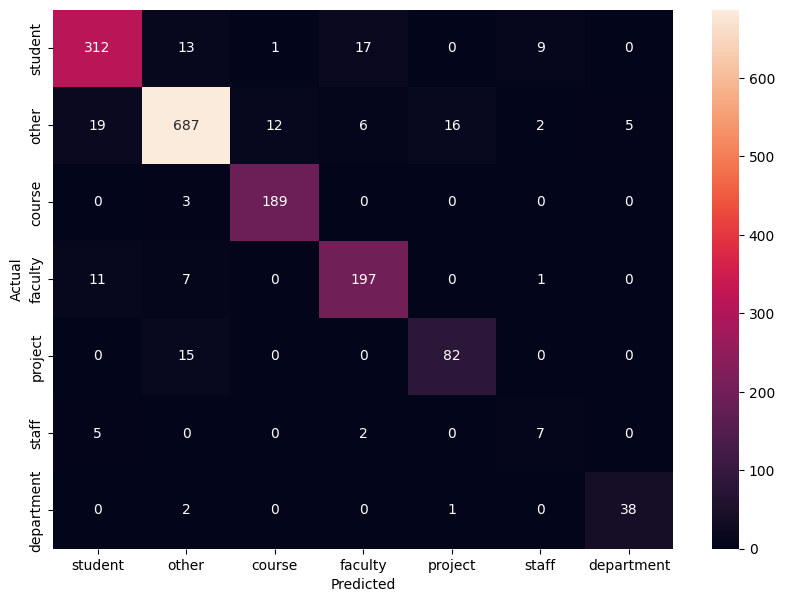

In [9]:
# Asumiendo que las columnas de etiquetas se llaman 'true_label' y 'predicted_label'
y_true = result['class_model1']
y_pred = result['class_model3']
# Calcular la precisión para cada clase
precisions = precision_score(y_true, y_pred, average=None)  # None para obtener la precisión de cada clase
# Calcular la precisión media total
avg_precision = precision_score(y_true, y_pred, average='macro')  # 'macro' calcula la media sin ponderar
print("Precisión por clase:", precisions)
print("Precisión media total:", avg_precision)

class_names=y_true.unique()
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [10]:
# Convertir a DataFrame para facilitar el filtrado
df = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})

# Filtrar las filas donde 'y_pred' es ''
df_filtered = df[df['y_true'] != 'None']

# Extraer de nuevo las listas después del filtrado
y_true_filtered = df_filtered['y_true'].tolist()
y_pred_filtered = df_filtered['y_pred'].tolist()
precisions = precision_score(y_true_filtered, y_pred_filtered, average=None)  # None para obtener la precisión de cada clase
# Calcular la precisión media total
avg_precision = precision_score(y_true_filtered, y_pred_filtered, average='macro')  # 'macro' calcula la media sin ponderar
print("Precisión por clase:", precisions)
print("Precisión media total:", avg_precision)

Precisión por clase: [0.93564356 0.88372093 0.88738739 0.94497937 0.82828283 0.36842105
 0.89913545]
Precisión media total: 0.8210815109770557


In [11]:
# Comprobar si '' está en y_pred
valor_vacio_presente = "None" in y_true.unique()
valor_vacio_presente

False

In [12]:
y_true.unique()[2]

'course'

In [13]:
df_filtered['y_true'].unique()

array(['student', 'other', 'course', 'faculty', 'project', 'staff',
       'department'], dtype=object)

In [14]:
len(y_true_filtered)

1659

In [15]:
len(y_true_filtered)/len(y_true)

1.0

['student' 'other' 'course' 'faculty' 'project' 'staff' 'department']
Precisión por clase: [0.21902017 0.434663   0.14356436 0.13963964 0.07070707 0.05263158
 0.02325581]
Precisión media total: 0.1547830901740511


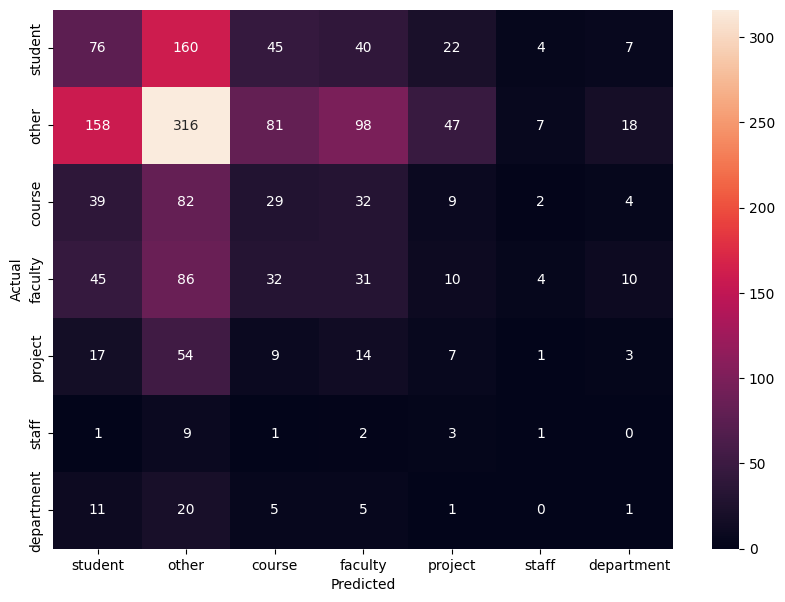

In [16]:

csv_path4 = './Alpaca_variante_2.csv'
df4 = pd.read_csv(csv_path3)
# Asumiendo que las columnas de etiquetas se llaman 'true_label' y 'predicted_label'
y_true = result['common_or_frequent']
y_pred = df4['predicted_class']

class_names=y_true.unique()
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)
# Calcular la precisión para cada clase
precisions = precision_score(y_true, y_pred, average=None,labels=class_names)  # None para obtener la precisión de cada clase
# Calcular la precisión media total
avg_precision = precision_score(y_true, y_pred, average='macro')  # 'macro' calcula la media sin ponderar
print(class_names)
print("Precisión por clase:", precisions)
print("Precisión media total:", avg_precision)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Precisión por clase: [0.90954774 0.86363636 0.91479821 0.9519774  0.74782609 0.54166667
 0.92485549]
Precisión media total: 0.8363297078129242


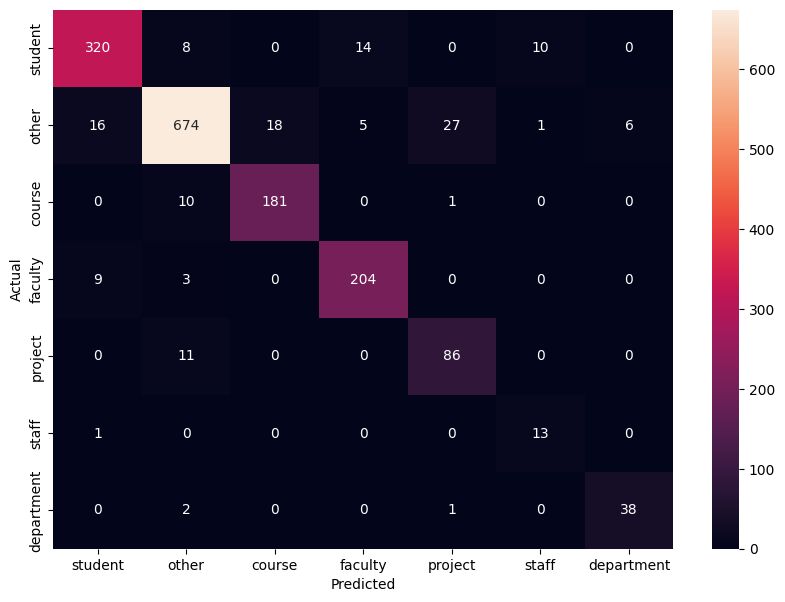

In [17]:
# Asumiendo que las columnas de etiquetas se llaman 'true_label' y 'predicted_label'
y_true = result['class_model1']
y_pred = result['class_model2']
# Calcular la precisión para cada clase
precisions = precision_score(y_true, y_pred, average=None)  # None para obtener la precisión de cada clase
# Calcular la precisión media total
avg_precision = precision_score(y_true, y_pred, average='macro')  # 'macro' calcula la media sin ponderar
print("Precisión por clase:", precisions)
print("Precisión media total:", avg_precision)

class_names=y_true.unique()
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [18]:
lista_file=['ckemt','igamsti','uqrfyv','gtchjnzw','apcgc','sphiqtdr','nwqios','lfukf','uihixqum','fhayg']
for name in lista_file:
    display(result[result['file_name']==name])

,file_name,class_model1,class_model2,class_model3,class_tuple,common_or_frequent,common
641,ckemt,student,student,student,"(student, student, student)",student,student


,file_name,class_model1,class_model2,class_model3,class_tuple,common_or_frequent,common
1470,igamsti,course,course,course,"(course, course, course)",course,course


,file_name,class_model1,class_model2,class_model3,class_tuple,common_or_frequent,common
1546,uqrfyv,other,other,other,"(other, other, other)",other,other


,file_name,class_model1,class_model2,class_model3,class_tuple,common_or_frequent,common
1441,gtchjnzw,faculty,faculty,faculty,"(faculty, faculty, faculty)",faculty,faculty


,file_name,class_model1,class_model2,class_model3,class_tuple,common_or_frequent,common
587,apcgc,faculty,faculty,student,"(faculty, faculty, student)",faculty,None


,file_name,class_model1,class_model2,class_model3,class_tuple,common_or_frequent,common
907,sphiqtdr,other,other,student,"(other, other, student)",other,None


,file_name,class_model1,class_model2,class_model3,class_tuple,common_or_frequent,common
1322,nwqios,student,student,student,"(student, student, student)",student,student


,file_name,class_model1,class_model2,class_model3,class_tuple,common_or_frequent,common
84,lfukf,other,other,other,"(other, other, other)",other,other


,file_name,class_model1,class_model2,class_model3,class_tuple,common_or_frequent,common
579,uihixqum,other,other,other,"(other, other, other)",other,other


,file_name,class_model1,class_model2,class_model3,class_tuple,common_or_frequent,common
1507,fhayg,faculty,faculty,faculty,"(faculty, faculty, faculty)",faculty,faculty


In [19]:
lista_file=['ckemt','igamsti','uqrfyv','gtchjnzw','apcgc','sphiqtdr',]

In [20]:
path_rag='./resultados_rag1_test.csv'
sub_df = pd.read_csv(path_rag)
# Paso 1: Extraer los nombres de archivo del sub-DataFrame
file_names = sub_df['file_name'].unique()

# Paso 2: Filtrar el DataFrame principal para estos nombres de archivo
df_filtrado = result[result['file_name'].isin(file_names)]

In [21]:
# Unir df_principal y sub_df en base a 'file_name'
nuevo_df = pd.merge(df_filtrado, sub_df, on='file_name', suffixes=('_principal', '_sub'))
nuevo_df

,file_name,class_model1,class_model2,class_model3,class_tuple,common_or_frequent,common,predicted_class
0,lfukf,other,other,other,"(other, other, other)",other,other,course
1,ukgoagzq,other,other,other,"(other, other, other)",other,other,other
2,kjjbbt,other,other,other,"(other, other, other)",other,other,student
3,hpsaouip,other,other,other,"(other, other, other)",other,other,course
4,egjrrq,student,student,student,"(student, student, student)",student,student,student
5,yawspc,faculty,faculty,faculty,"(faculty, faculty, faculty)",faculty,faculty,faculty
6,aktnyrw,student,student,student,"(student, student, student)",student,student,student
7,rteuy,staff,staff,staff,"(staff, staff, staff)",staff,staff,staff
8,pjnwjfgw,student,student,student,"(student, student, student)",student,student,student
9,khtaydx,faculty,faculty,faculty,"(faculty, faculty, faculty)",faculty,faculty,faculty


Precisión por clase: [0.5        0.85714286 1.         0.         0.5        0.7       ]
Precisión media total: 0.5928571428571429


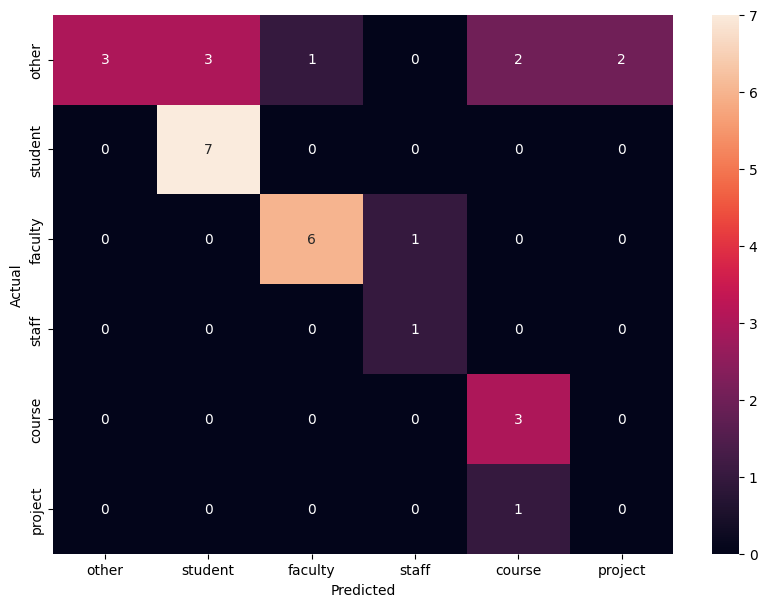

In [22]:
# Asumiendo que las columnas de etiquetas se llaman 'true_label' y 'predicted_label'
y_true = nuevo_df['class_model1']
y_pred = nuevo_df['predicted_class']
# Calcular la precisión para cada clase
precisions = precision_score(y_true, y_pred, average=None)  # None para obtener la precisión de cada clase
# Calcular la precisión media total
avg_precision = precision_score(y_true, y_pred, average='macro')  # 'macro' calcula la media sin ponderar
print("Precisión por clase:", precisions)
print("Precisión media total:", avg_precision)

class_names=y_true.unique()
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
path_rag='./resultados_rag1_test_1.csv'
sub_df = pd.read_csv(path_rag)
# Paso 1: Extraer los nombres de archivo del sub-DataFrame
file_names = sub_df['file_name'].unique()
print(file_names)
# Paso 2: Filtrar el DataFrame principal para estos nombres de archivo
df_filtrado = result[result['file_name'].isin(file_names)]
# Unir df_principal y sub_df en base a 'file_name'
nuevo_df = pd.merge(df_filtrado, sub_df, on='file_name', suffixes=('_principal', '_sub'))


['gotjzb' 'yawspc' 'uqrfyv' ... 'vnibwn' 'cqyvoud' 'xvcldiw']


In [24]:
nuevo_df

,file_name,class_model1,class_model2,class_model3,class_tuple,common_or_frequent,common,predicted_class
0,wfqwne,student,student,student,"(student, student, student)",student,student,faculty
1,wwisnmd,other,other,other,"(other, other, other)",other,other,faculty
2,xlhpgzu,other,other,other,"(other, other, other)",other,other,course
3,yghie,student,student,student,"(student, student, student)",student,student,student
4,omvawb,other,other,other,"(other, other, other)",other,other,course
...,...,...,...,...,...,...,...,...
1654,umhdmc,staff,staff,faculty,"(staff, staff, faculty)",staff,None,faculty
1655,pfhqfrd,course,course,course,"(course, course, course)",course,course,course
1656,ezpaic,other,other,other,"(other, other, other)",other,other,course
1657,iwwwqw,faculty,faculty,faculty,"(faculty, faculty, faculty)",faculty,faculty,faculty


1659 1659
Precisión por clase: [0.36594912 0.4691358  0.48448687 0.94252874 0.26530612 0.02941176
 0.74131274]
Precisión media total: 0.4711615942072932


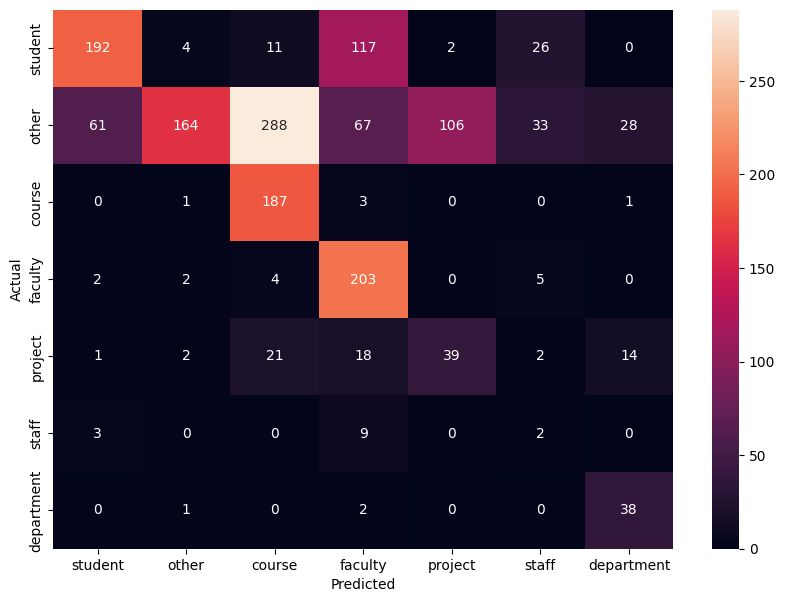

,file_name,predicted_class,class_model1,class_model2,class_model3,class_tuple,common_or_frequent,common,_merge


In [25]:
# Asumiendo que las columnas de etiquetas se llaman 'true_label' y 'predicted_label'
y_true = nuevo_df['class_model1']
y_pred = nuevo_df['predicted_class']
print(len(y_true),len(y_pred))
# Calcular la precisión para cada clase
precisions = precision_score(y_true, y_pred, average=None)  # None para obtener la precisión de cada clase
# Calcular la precisión media total
avg_precision = precision_score(y_true, y_pred, average='macro')  # 'macro' calcula la media sin ponderar
print("Precisión por clase:", precisions)
print("Precisión media total:", avg_precision)

class_names=y_true.unique()
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

combined_df = pd.merge(sub_df, result, on='file_name', how='outer', indicator=True)

# Filtrar las filas que son diferentes
different_rows = combined_df[combined_df['_merge'] != 'both']
display(different_rows)

In [26]:
path_rag='./resultados_rag1_test_promt_2.csv'
sub_df = pd.read_csv(path_rag)
# Paso 1: Extraer los nombres de archivo del sub-DataFrame
file_names = sub_df['file_name'].unique()
print(file_names)
# Paso 2: Filtrar el DataFrame principal para estos nombres de archivo
df_filtrado = result[result['file_name'].isin(file_names)]
# Unir df_principal y sub_df en base a 'file_name'
nuevo_df = pd.merge(df_filtrado, sub_df, on='file_name', suffixes=('_principal', '_sub'))


['gotjzb' 'yawspc' 'uqrfyv' ... 'cqyvoud' 'xvcldiw' 'higwe']


1660 1660
Precisión por clase: [0.51396648 0.68421053 0.49479167 0.73784355 0.43478261 0.032
 0.77272727]
Precisión media total: 0.5243317295213356


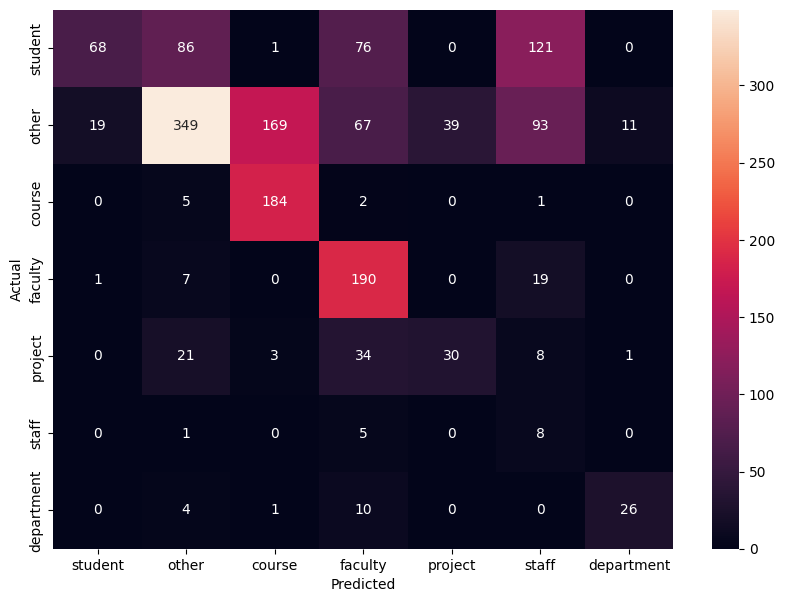

In [27]:
# Asumiendo que las columnas de etiquetas se llaman 'true_label' y 'predicted_label'
y_true = nuevo_df['class_model1']
y_pred = nuevo_df['predicted_class']
print(len(y_true),len(y_pred))
# Calcular la precisión para cada clase
precisions = precision_score(y_true, y_pred, average=None)  # None para obtener la precisión de cada clase
# Calcular la precisión media total
avg_precision = precision_score(y_true, y_pred, average='macro')  # 'macro' calcula la media sin ponderar
print("Precisión por clase:", precisions)
print("Precisión media total:", avg_precision)

class_names=y_true.unique()
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
combined_df = pd.merge(sub_df, result, on='file_name', how='outer', indicator=True)

# Filtrar las filas que son diferentes
different_rows = combined_df[combined_df['_merge'] != 'both']
display(different_rows)

,file_name,predicted_class,class_model1,class_model2,class_model3,class_tuple,common_or_frequent,common,_merge


['gotjzb' 'yawspc' 'uqrfyv' 'gtchjnzw' 'aktnyrw' 'egjrrq' 'ukgoagzq'
 'kjjbbt' 'igamsti' 'ckemt' 'apcgc' 'akbfdvs' 'sphiqtdr' 'hpsaouip'
 'pznqy' 'beveykcq' 'uuyzux' 'sorah' 'nwqios' 'lfukf' 'uihixqum' 'espxbh'
 'oneaef' 'wuuif' 'rteuy' 'khtaydx' 'xyqyyd' 'pxcwhekn' 'pjnwjfgw' 'fhayg'
 'gyutr' 'xuoppkn' 'kxbknr' 'wognyts' 'gedcirqa' 'pbkzt' 'oovhs' 'szlmwq'
 'vircjd' 'cdruyo' 'tnuwsmd' 'syphpwi' 'jwfzxxg' 'ppewcgla' 'crusceee'
 'wzzsat' 'tibssnu' 'wwqvvjs' 'wsrchup' 'udghn' 'ihsbfi' 'ydbfhql'
 'xxyuea' 'quatg' 'fczhavit' 'tbcbekmq' 'oecphzmr' 'xyiafjk' 'kcldhpcj'
 'yvxpvlc' 'tpedb' 'wxbhjnn' 'ufsug' 'bhptsyjz' 'gxqadkgw' 'olbqqcm'
 'debuzvc' 'ffcrqo' 'nlxxo' 'zvrysckq' 'jfqpd' 'tvmqpm' 'ouyuwu' 'boarhn'
 'qvxwlws' 'xgtpxl' 'utthj' 'xvlikyt' 'wcwtzpny' 'eudatvy' 'jdwxv' 'qjjlm'
 'czkze' 'quyjp' 'thxcjaib' 'wvhluq' 'brmtqcj' 'vxydxvhn' 'tbkoiw'
 'zlshvea' 'woiup' 'rkokgno' 'yolbla' 'ujnnvh' 'rwrko' 'lclvhfy' 'meqmm'
 'gjhhavd' 'cnlce' 'xegyoao' 'eyxtv' 'yftemp' 'idjfvfvk' 'cotsv'
 'cjnrz

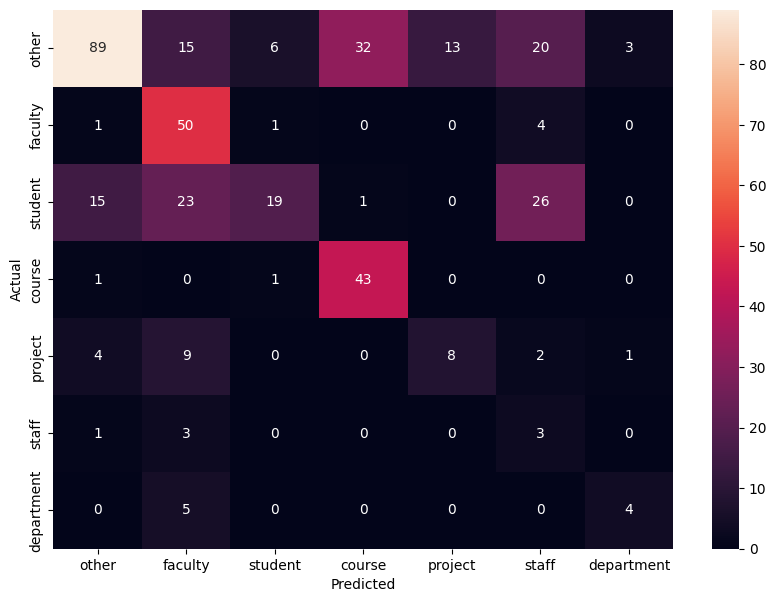

In [29]:
path_rag='./resultados_llm2_test_2_1.csv'
sub_df = pd.read_csv(path_rag)
# Paso 1: Extraer los nombres de archivo del sub-DataFrame
file_names = sub_df['file_name'].unique()
print(file_names)
# Paso 2: Filtrar el DataFrame principal para estos nombres de archivo
df_filtrado = result[result['file_name'].isin(file_names)]
# Unir df_principal y sub_df en base a 'file_name'
nuevo_df = pd.merge(df_filtrado, sub_df, on='file_name', suffixes=('_principal', '_sub'))
# Asumiendo que las columnas de etiquetas se llaman 'true_label' y 'predicted_label'
y_true = nuevo_df['class_model1']
y_pred = nuevo_df['predicted_class']
print(len(y_true),len(y_pred))
# Calcular la precisión para cada clase
precisions = precision_score(y_true, y_pred, average=None)  # None para obtener la precisión de cada clase
# Calcular la precisión media total
avg_precision = precision_score(y_true, y_pred, average='macro')  # 'macro' calcula la media sin ponderar
print("Precisión por clase:", precisions)
print("Precisión media total:", avg_precision)

class_names=y_true.unique()
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# -

```python

def get_file_2(path_file):  
  #print(path_file)
  with open(path_file) as f:
      data = json.load(f)
  #print(data.keys())
  dict_text={key: data[key] for key in data.keys() if key in {'title','summary','links'} }
  try:
    dict_text['keyword']=data['keyword_frequency_kebert']
  except:
    print(data.keys())
  return dict_text,data['ground_truth']

def creating_promt_3(class_name,text_traindata,text_classification,keywords):
  class_name=(', ').join(class_name)
  text_traindata = ('\n\n').join([f" Text:'{text}' \n Classification: {label}" for text,label in text_traindata])
  palabras_clave = ('\n').join([f"{label} keywords are {keys} " for label,keys in keywords])
  return f" Classify the text in this class : {class_name}.\n\
  Reply with only one word:  {class_name}. \n\
  {palabras_clave} \n\n \
  Examples: \n\
  {text_traindata} \n\n\
  Text: '{text_classification}' \n\
  Classification: "

    ```

Model llama2-chat-ayb-13b.Q5_K_M.gguf

['gotjzb' 'yawspc' 'uqrfyv' ... 'apkhal' 'vnibwn' 'cqyvoud']
1658 1658
Precisión por clase: [0.5280236  0.625      0.47420147 0.73248408 0.44047619 0.03524229
 0.79591837]
Precisión media total: 0.5187637140038116


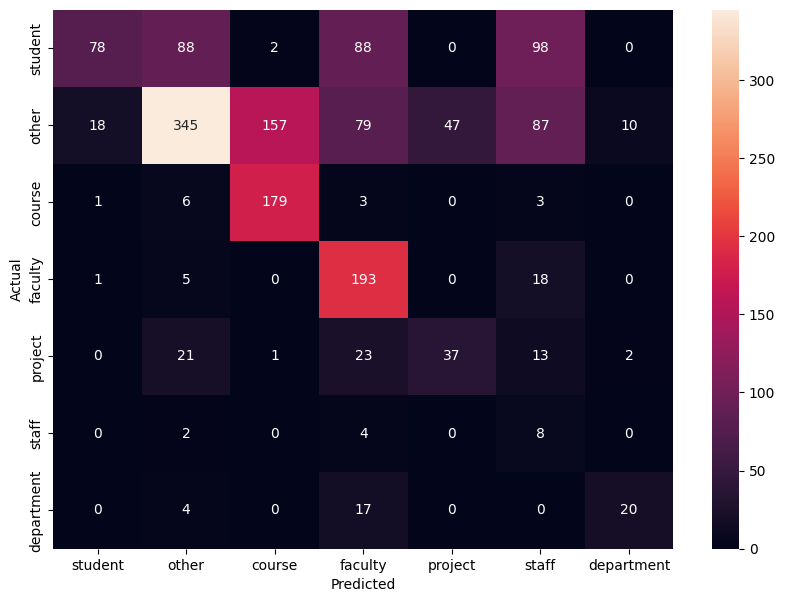

In [30]:
path_rag='./resultados_llm2_test_2_2.csv'
sub_df = pd.read_csv(path_rag)
# Paso 1: Extraer los nombres de archivo del sub-DataFrame
file_names = sub_df['file_name'].unique()
print(file_names)
# Paso 2: Filtrar el DataFrame principal para estos nombres de archivo
df_filtrado = result[result['file_name'].isin(file_names)]
# Unir df_principal y sub_df en base a 'file_name'
nuevo_df = pd.merge(df_filtrado, sub_df, on='file_name', suffixes=('_principal', '_sub'))
# Asumiendo que las columnas de etiquetas se llaman 'true_label' y 'predicted_label'
y_true = nuevo_df['class_model1']
y_pred = nuevo_df['predicted_class']
print(len(y_true),len(y_pred))
# Calcular la precisión para cada clase
precisions = precision_score(y_true, y_pred, average=None)  # None para obtener la precisión de cada clase
# Calcular la precisión media total
avg_precision = precision_score(y_true, y_pred, average='macro')  # 'macro' calcula la media sin ponderar
print("Precisión por clase:", precisions)
print("Precisión media total:", avg_precision)

class_names=y_true.unique()
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# -

```python

def get_file_2(path_file):  
  #print(path_file)
  with open(path_file) as f:
      data = json.load(f)
  #print(data.keys())
  dict_text={key: data[key] for key in data.keys() if key in {'title','summary','links'} }
  try:
    dict_text['keyword']=data['keyword_frequency_kebert']
  except:
    print(data.keys())
  return dict_text,data['ground_truth']

def creating_promt_3(class_name,text_traindata,text_classification,keywords):
  class_name=(', ').join(class_name)
  text_traindata = ('\n\n').join([f" Text:'{text}' \n Classification: {label}" for text,label in text_traindata])
  palabras_clave = ('\n').join([f"{label} keywords are {keys} " for label,keys in keywords])
  return f" Classify the text in this class : {class_name}.\n\
  Reply with only one word:  {class_name}. \n\
  {palabras_clave} \n\n \
  Examples: \n\
  {text_traindata} \n\n\
  Text: '{text_classification}' \n\
  Classification: "

    ```

['gtchjnzw' 'aktnyrw' 'egjrrq' 'ckemt' 'apcgc' 'akbfdvs' 'sphiqtdr'
 'hpsaouip' 'pznqy' 'beveykcq' 'uuyzux' 'gotjzb' 'yawspc' 'uqrfyv'
 'ukgoagzq' 'kjjbbt' 'igamsti' 'sorah' 'nwqios' 'lfukf' 'uihixqum'
 'espxbh' 'oneaef' 'wuuif' 'rteuy' 'khtaydx' 'xyqyyd' 'pxcwhekn'
 'pjnwjfgw' 'fhayg' 'gyutr' 'xuoppkn' 'kxbknr' 'wognyts' 'gedcirqa'
 'pbkzt' 'oovhs' 'szlmwq' 'vircjd' 'cdruyo' 'tnuwsmd' 'syphpwi' 'jwfzxxg'
 'ppewcgla' 'crusceee' 'wzzsat' 'tibssnu' 'wwqvvjs' 'wsrchup' 'udghn'
 'ihsbfi' 'ydbfhql' 'xxyuea' 'quatg' 'fczhavit' 'tbcbekmq' 'oecphzmr'
 'xyiafjk' 'kcldhpcj' 'yvxpvlc' 'tpedb' 'wxbhjnn' 'ufsug' 'bhptsyjz'
 'gxqadkgw' 'olbqqcm' 'debuzvc' 'ffcrqo' 'nlxxo' 'zvrysckq' 'jfqpd'
 'tvmqpm' 'ouyuwu' 'boarhn' 'qvxwlws' 'xgtpxl' 'utthj' 'xvlikyt'
 'wcwtzpny' 'eudatvy' 'jdwxv' 'qjjlm' 'czkze' 'quyjp' 'thxcjaib' 'wvhluq'
 'brmtqcj' 'vxydxvhn' 'tbkoiw' 'zlshvea' 'woiup' 'rkokgno' 'yolbla'
 'ujnnvh' 'rwrko' 'lclvhfy' 'meqmm' 'gjhhavd' 'cnlce' 'xegyoao' 'eyxtv'
 'yftemp' 'idjfvfvk' 'cotsv' 'cjnrz

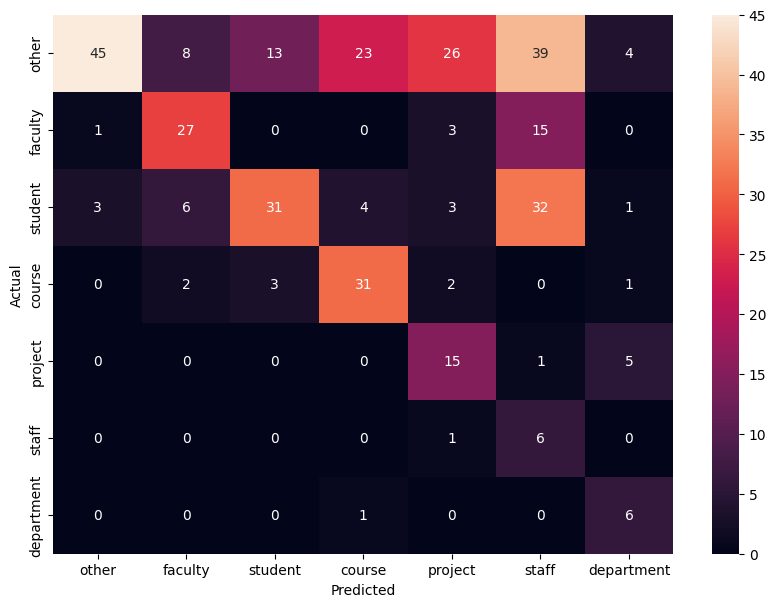

In [31]:


path_rag='./resultados_llm2_promt_2_model_mistral-7b-v0.csv'
sub_df = pd.read_csv(path_rag)
# Paso 1: Extraer los nombres de archivo del sub-DataFrame
file_names = sub_df['file_name'].unique()
print(file_names)
# Paso 2: Filtrar el DataFrame principal para estos nombres de archivo
df_filtrado = result[result['file_name'].isin(file_names)]
# Unir df_principal y sub_df en base a 'file_name'
nuevo_df = pd.merge(df_filtrado, sub_df, on='file_name', suffixes=('_principal', '_sub'))
# Asumiendo que las columnas de etiquetas se llaman 'true_label' y 'predicted_label'
y_true = nuevo_df['class_model1']
y_pred = nuevo_df['predicted_class']
print(len(y_true),len(y_pred))
# Calcular la precisión para cada clase
precisions = precision_score(y_true, y_pred, average=None,labels=class_names)  # None para obtener la precisión de cada clase
# Calcular la precisión media total
avg_precision = precision_score(y_true, y_pred, average='macro')  # 'macro' calcula la media sin ponderar
print(class_names)
print("Precisión por clase:", precisions)
print("Precisión media total:", avg_precision)

class_names=y_true.unique()
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

alpaca-classification/not_git/comparative/promt_3_r/resultados_llm2_test_promt_3llama2-chat-ayb-13b.Q5_K_M.csv

# - 
```python

def get_file_2(path_file):  
  #print(path_file)
  with open(path_file) as f:
      data = json.load(f)
  #print(data.keys())
  dict_text={key: data[key] for key in data.keys() if key in {'title','summary','links'} }
  try:
    dict_text['keyword']=data['keyword_frequency_kebert']
  except:
    print(data.keys())
  return dict_text,data['ground_truth']

def creating_promt_5(class_name,text_traindata,text_classification,keywords):
  # quitamos other de los ejemplos y dejamos que sea como todo lo que no tenga clase como otro
  class_name=(', ').join(class_name)
  text_traindata = ('\n\n').join([f" Text:'{tranform_text(text)}' \n class: {label}" for text,label in text_traindata if label!='other'])
  palabras_clave = ('\n').join([f"{label} keywords are {keys} " for label,keys in keywords])
  return f" Classify  text into one of 7 class : {class_name}.\n\
  Reply with only one word:  {class_name}. \n\
  {palabras_clave} \n\n \
  Examples: \n\
  {text_traindata} \n\n\
  Text: '{tranform_text(text_classification)}' \n\
  class: "
    
    ```

Como se observa lo que se intenta es un nuevo promt para ver que tal se comporta  ./promt_3_r/resultados_llm2_test_promt_3llama2-chat-ayb-13b.Q5_K_M.csv

1659 1659
['other' 'faculty' 'student' 'course' 'project' 'staff' 'department']
Precisión por clase: [0.83769634 0.59677419 0.75438596 0.41214751 0.38216561 0.03311258
 0.49253731]
Precisión media total: 0.5012599286102899


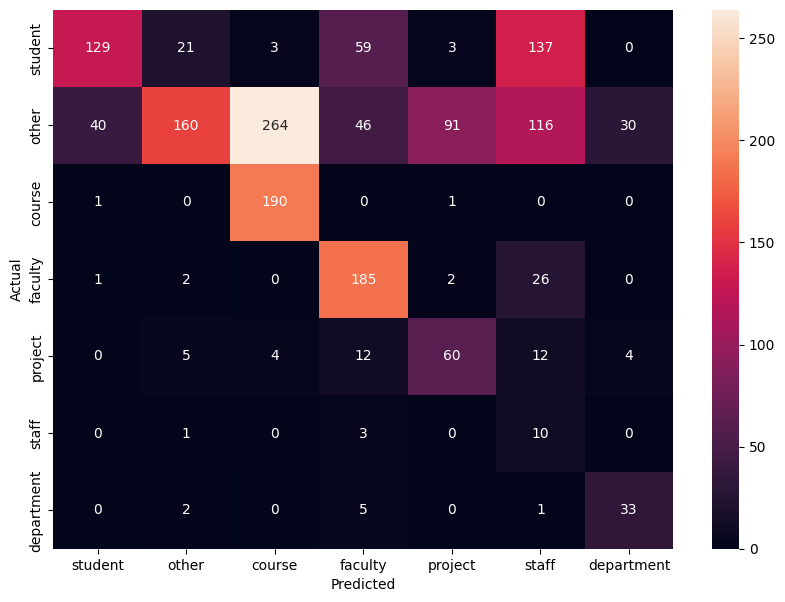

,file_name,predicted_class,class_model1,class_model2,class_model3,class_tuple,common_or_frequent,common,_merge


In [32]:
path_rag='./promt_3_r/resultados_llm2_test_promt_3llama2-chat-ayb-13b.Q5_K_M.csv'
sub_df = pd.read_csv(path_rag)
# Paso 1: Extraer los nombres de archivo del sub-DataFrame
file_names = sub_df['file_name'].unique()
#print(file_names)
# Paso 2: Filtrar el DataFrame principal para estos nombres de archivo
df_filtrado = result[result['file_name'].isin(file_names)]
# Unir df_principal y sub_df en base a 'file_name'
nuevo_df = pd.merge(df_filtrado, sub_df, on='file_name', suffixes=('_principal', '_sub'))
# Asumiendo que las columnas de etiquetas se llaman 'true_label' y 'predicted_label'
y_true = nuevo_df['class_model1']
y_pred = nuevo_df['predicted_class']
print(len(y_true),len(y_pred))
# Calcular la precisión para cada clase
precisions = precision_score(y_true, y_pred, average=None,labels=class_names)  # None para obtener la precisión de cada clase
# Calcular la precisión media total
avg_precision = precision_score(y_true, y_pred, average='macro')  # 'macro' calcula la media sin ponderar
print(class_names)
print("Precisión por clase:", precisions)
print("Precisión media total:", avg_precision)

class_names=y_true.unique()
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

combined_df = pd.merge(sub_df, result, on='file_name', how='outer', indicator=True)

# Filtrar las filas que son diferentes
different_rows = combined_df[combined_df['_merge'] != 'both']
display(different_rows)

Vamos a almacenar que esta mal empecemos por las clases que peores resultados se obtiene en este caso vemos que es staff

In [33]:
# Filtrar el DataFrame para obtener las filas donde la predicción es 'staff' y la etiqueta verdadera es 'student'
staff_predicted_students = nuevo_df[
    (nuevo_df['predicted_class'] == 'staff') & (nuevo_df['class_model1'] == 'student')
]

# Extraer los nombres de los archivos de estas filas
staff_predicted_student_files = staff_predicted_students['file_name'].tolist()

len(staff_predicted_student_files)

# Extraer los nombres de los archivos de estas filas
staff_predicted_student_files = staff_predicted_students['file_name'].tolist()

# Guardar los nombres de los archivos en un archivo txt separado por comas
path_to_txt = 'staff_predicted_student_files.txt'
with open(path_to_txt, 'w') as f:
    f.write(','.join(staff_predicted_student_files))

In [34]:
# Cargar los nombres de archivo del archivo txt y almacenarlos en una lista
with open(path_to_txt, 'r') as f:
    loaded_files = f.read().split(',')

print(loaded_files)

['wfqwne', 'pzaevn', 'mmtvoq', 'uiidp', 'byyxifzz', 'aaclkul', 'jdjamsls', 'ysfrk', 'xmmhnp', 'nnccrkk', 'bgxblaq', 'tbztbzu', 'lfuutmdo', 'ibxwya', 'bovyrx', 'xxnbrcs', 'hurpsrje', 'sdyiaw', 'cifyk', 'qjimegkq', 'qfxbal', 'xbazlov', 'mdfbugu', 'egjrrq', 'xiwqo', 'ticyp', 'zobjoz', 'utcniycx', 'gdxmso', 'cbdxh', 'xlmkr', 'vgkqf', 'upzow', 'uapyjabq', 'aktnyrw', 'laazymrn', 'qraso', 'nlxxo', 'fhwlo', 'qxdrhk', 'niizdbw', 'pbgmp', 'pkxxb', 'xhokpp', 'gtgxgzcn', 'muncc', 'wuuosaed', 'xfyqrgf', 'nmhpr', 'qtwwz', 'uypqg', 'zvrysckq', 'ekauzlfp', 'caaelf', 'owlrody', 'irhvprt', 'yadbhst', 'rwmiz', 'ywrzvbyr', 'goxgfr', 'ckemt', 'jryqezxd', 'ypxfdn', 'tkkhe', 'vtgaqhef', 'xefhoj', 'ylwraohb', 'llsokyh', 'dhrezf', 'kypnmal', 'utvxb', 'ghxnl', 'lexfksko', 'redifgfj', 'zwcgsbo', 'olyhatok', 'uxhlojgi', 'hyutx', 'hmidet', 'udfqv', 'zemgq', 'rbylaaw', 'qnoufgn', 'lynsj', 'pspktcof', 'ddlpfjed', 'lcnosc', 'uncjwyyp', 'kgaxenm', 'dqxgzzq', 'snkofs', 'tciwtsu', 'qrbuxab', 'vofqtp', 'nizpnfpt', 'lgztt

# -
"Prompt": "prmpt3 (keys)",

"Tiempo": "[1:14:33<00:00, 3.58s/it]",

"Modelo": "llama2-chat-ayb-13b.Q5_K_M.gguf"

1659 1659
['student' 'other' 'course' 'faculty' 'project' 'staff' 'department']
Precisión por clase: [0.61151079 0.67357513 0.22517483 0.53571429 0.14418605 0.01408451
 0.13978495]
Precisión media total: 0.3348615045114481


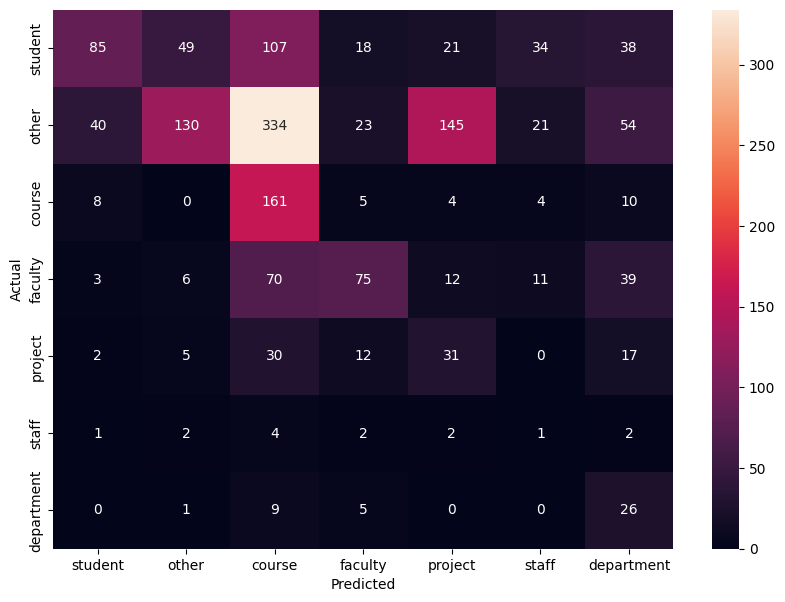

In [35]:
path_rag='./Resultados_Abraham/Nuevos_Resultados/resultados_2023-11-19_12-38-53.csv'
sub_df = pd.read_csv(path_rag)
# Paso 1: Extraer los nombres de archivo del sub-DataFrame
file_names = sub_df['file_name'].unique()
#print(file_names)
# Paso 2: Filtrar el DataFrame principal para estos nombres de archivo
df_filtrado = result[result['file_name'].isin(file_names)]
# Unir df_principal y sub_df en base a 'file_name'
nuevo_df = pd.merge(df_filtrado, sub_df, on='file_name', suffixes=('_principal', '_sub'))
# Asumiendo que las columnas de etiquetas se llaman 'true_label' y 'predicted_label'
y_true = nuevo_df['class_model1']
y_pred = nuevo_df['predicted_class']
print(len(y_true),len(y_pred))
# Calcular la precisión para cada clase
precisions = precision_score(y_true, y_pred, average=None,labels=class_names)  # None para obtener la precisión de cada clase
# Calcular la precisión media total
avg_precision = precision_score(y_true, y_pred, average='macro')  # 'macro' calcula la media sin ponderar
print(class_names)
print("Precisión por clase:", precisions)
print("Precisión media total:", avg_precision)

class_names=y_true.unique()
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# -
"Prompt": "prmpt3 (keys)",

"Tiempo": "[16:24:41<00:00, 3.58s/it]",

"Modelo": "llama-2-70b-chat.Q3_K_S.gguf"

1659 1659
['student' 'other' 'course' 'faculty' 'project' 'staff' 'department']
Precisión por clase: [0.41875    0.68644068 0.15097691 0.56666667 0.22580645 0.
 0.18348624]
Precisión media total: 0.3188752777416623


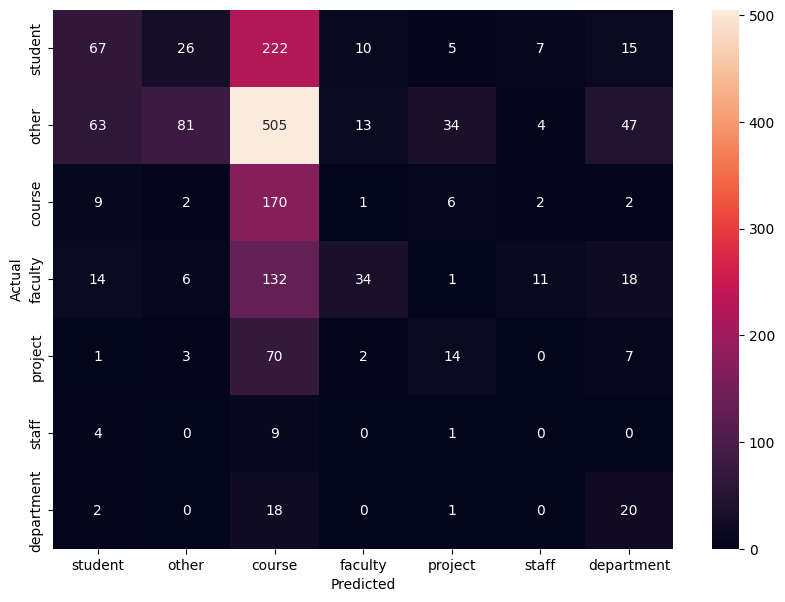

In [36]:
path_rag='./Resultados_Abraham/Nuevos_Resultados/resultados_2023-11-20_02-39-31.csv'
sub_df = pd.read_csv(path_rag)
# Paso 1: Extraer los nombres de archivo del sub-DataFrame
file_names = sub_df['file_name'].unique()
#print(file_names)
# Paso 2: Filtrar el DataFrame principal para estos nombres de archivo
df_filtrado = result[result['file_name'].isin(file_names)]
# Unir df_principal y sub_df en base a 'file_name'
nuevo_df = pd.merge(df_filtrado, sub_df, on='file_name', suffixes=('_principal', '_sub'))
# Asumiendo que las columnas de etiquetas se llaman 'true_label' y 'predicted_label'
y_true = nuevo_df['class_model1']
y_pred = nuevo_df['predicted_class']
print(len(y_true),len(y_pred))
# Calcular la precisión para cada clase
precisions = precision_score(y_true, y_pred, average=None,labels=class_names)  # None para obtener la precisión de cada clase
# Calcular la precisión media total
avg_precision = precision_score(y_true, y_pred, average='macro')  # 'macro' calcula la media sin ponderar
print(class_names)
print("Precisión por clase:", precisions)
print("Precisión media total:", avg_precision)

class_names=y_true.unique()
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
staff_files = result[
    (result['class_model1'] == 'student') 
]
len(staff_files)

352

In [38]:
# Filtrar el DataFrame para obtener las filas donde la predicción es 'staff' y la etiqueta verdadera es 'student'
staff_predicted_students = nuevo_df[
    (nuevo_df['predicted_class'] == 'staff') & (nuevo_df['class_model1'] == 'student')
]

# Extraer los nombres de los archivos de estas filas
staff_predicted_student_files = staff_predicted_students['file_name'].tolist()

len(staff_predicted_student_files)

7

# - 

 Classify the text in this class : student, faculty, course, project, department, staff, other.
  Reply with only one word:  student, faculty, course, project, department, staff, other. 

  ```python

def get_file_2(path_file):  
  #print(path_file)
  with open(path_file) as f:
      data = json.load(f)
  #print(data.keys())
  dict_text={key: data[key] for key in data.keys() if key in {'title','summary','links'} }
  try:
    dict_text['keyword']=data['keyword_frequency_kebert'][:3]
  except:
    print(data.keys())
  return dict_text,data['ground_truth']

def get_all_files(path_data,max_cont=-1):

    #'./data/splits/train_json'
    classes=get_class(path_data)
    archiver_per_clases={}
    prompt_per_clases={}
    cantidad_archivos={}
    promt_all_reson=[]
    archiver_all_reson=[]
    if len(classes)>0:
      for class_name in classes:
        #print(get_archives(os.path.join(path_data,i)))
        archiver_per_clases[class_name]=get_archives(os.path.join(path_data,class_name))[0:max_cont]
        prompt_per_clases[class_name]=[get_file_2(archive) for archive in  archiver_per_clases[class_name]]
        promt_all_reson.extend(prompt_per_clases[class_name])
        archiver_all_reson.extend(archiver_per_clases[class_name])

        #print(len(archiver_per_clases[class_name]),promt_all_reson)
        cantidad_archivos[class_name]=len(archiver_per_clases[class_name])
    else:
       archiver_per_clases['test']=get_archives(os.path.join(path_data,class_name))
       prompt_per_clases['test']=[get_file_2(archive) for archive  in  archiver_per_clases['test']]

    # Clave especial para ir de último
    clave_especial = 'other'
    # Ordenar el diccionario por el valor, manteniendo 'other' al final si existe
    ordenado = sorted(cantidad_archivos.items(), key=lambda item: (item[0] == clave_especial, -item[1]))

    ordenado=[i[0] for i in ordenado ]
    return archiver_per_clases,prompt_per_clases,promt_all_reson,archiver_all_reson,ordenado


def creating_promt_5(class_name,text_traindata,text_classification,keywords):
  # quitamos other de los ejemplos y dejamos que sea como todo lo que no tenga clase como otro
  class_name=(', ').join(class_name)
  text_traindata = ('\n\n').join([f" Text:'{tranform_text(text)}' \n class: {label}" for text,label in text_traindata if label!='other'])
  palabras_clave = ('\n').join([f"{label} keywords are {keys} " for label,keys in keywords])
  return f" Classify  text into one of 7 class : {class_name}.\n\
  Reply with only one word:  {class_name}. \n\
  {palabras_clave} \n\n \
  Examples: \n\
  {text_traindata} \n\n\
  Text: '{tranform_text(text_classification)}' \n\
  class: "

```

1659 1659
['student' 'other' 'course' 'faculty' 'project' 'staff' 'department']
Precisión por clase: [0.4160105  0.76243094 0.62910798 0.6195122  0.42857143 0.02678571
 0.69230769]
Precisión media total: 0.5106752070602324


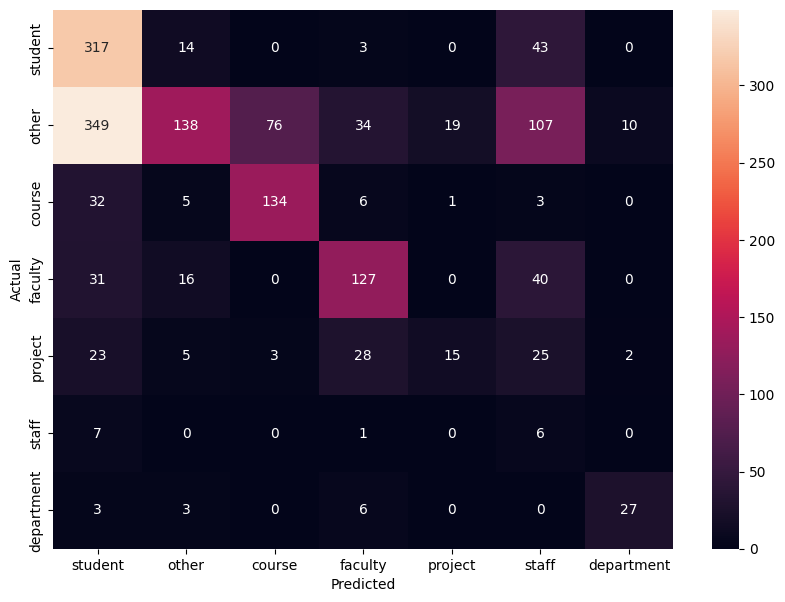

,file_name,predicted_class,class_model1,class_model2,class_model3,class_tuple,common_or_frequent,common,_merge
1659,sbzkac,NaN,other,other,other,"(other, other, other)",other,other,right_only
1660,xgtpxl,NaN,student,student,student,"(student, student, student)",student,student,right_only
1661,qgzfwk,NaN,other,other,other,"(other, other, other)",other,other,right_only
1662,livhw,NaN,course,course,course,"(course, course, course)",course,course,right_only
1663,xicjxs,NaN,course,course,course,"(course, course, course)",course,course,right_only
...,...,...,...,...,...,...,...,...,...
1760,jwawqn,NaN,student,student,student,"(student, student, student)",student,student,right_only
1761,igswa,NaN,course,course,course,"(course, course, course)",course,course,right_only
1762,igamsti,NaN,course,course,course,"(course, course, course)",course,course,right_only
1763,ryzxu,NaN,other,other,other,"(other, other, other)",other,other,right_only


In [39]:
path_rag='./change_example/promt3_with_class_order_disitin.csv'
sub_df = pd.read_csv(path_rag)
# Paso 1: Extraer los nombres de archivo del sub-DataFrame
file_names = sub_df['file_name'].unique()
#print(file_names)
# Paso 2: Filtrar el DataFrame principal para estos nombres de archivo
df_filtrado = result[result['file_name'].isin(file_names)]
# Unir df_principal y sub_df en base a 'file_name'
nuevo_df = pd.merge(df_filtrado, sub_df, on='file_name', suffixes=('_principal', '_sub'))
# Asumiendo que las columnas de etiquetas se llaman 'true_label' y 'predicted_label'
y_true = nuevo_df['class_model1']
y_pred = nuevo_df['predicted_class']
print(len(y_true),len(y_pred))
# Calcular la precisión para cada clase
precisions = precision_score(y_true, y_pred, average=None,labels=class_names)  # None para obtener la precisión de cada clase
# Calcular la precisión media total
avg_precision = precision_score(y_true, y_pred, average='macro')  # 'macro' calcula la media sin ponderar
print(class_names)
print("Precisión por clase:", precisions)
print("Precisión media total:", avg_precision)

class_names=y_true.unique()
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

combined_df = pd.merge(sub_df, result, on='file_name', how='outer', indicator=True)

# Filtrar las filas que son diferentes
different_rows = combined_df[combined_df['_merge'] != 'both']
display(different_rows)

226 226
['student' 'other' 'course' 'faculty' 'project' 'staff' 'department']
Precisión por clase: [0.42727273 1.         0.69444444 0.65625    0.5        0.0625
 0.44444444]
Precisión media total: 0.5407016594516595


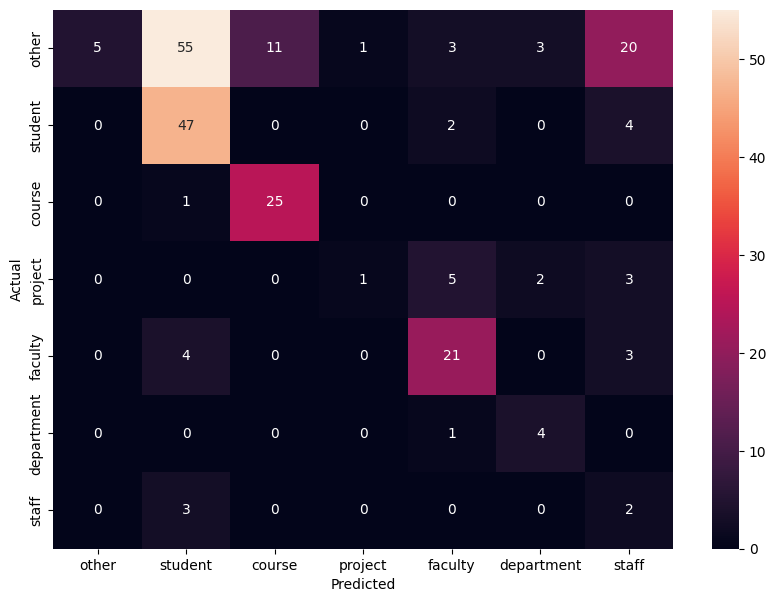

In [40]:
path_rag='./change_example/key_promt_new_promt_7_eval_staff_llama2-chat-ayb-13b.Q5_K_M_with_other.csv'
sub_df = pd.read_csv(path_rag)
# Paso 1: Extraer los nombres de archivo del sub-DataFrame
file_names = sub_df['file_name'].unique()
#print(file_names)
# Paso 2: Filtrar el DataFrame principal para estos nombres de archivo
df_filtrado = result[result['file_name'].isin(file_names)]
# Unir df_principal y sub_df en base a 'file_name'
nuevo_df = pd.merge(df_filtrado, sub_df, on='file_name', suffixes=('_principal', '_sub'))
# Asumiendo que las columnas de etiquetas se llaman 'true_label' y 'predicted_label'
y_true = nuevo_df['class_model1']
y_pred = nuevo_df['predicted_class']
print(len(y_true),len(y_pred))
# Calcular la precisión para cada clase
precisions = precision_score(y_true, y_pred, average=None,labels=class_names)  # None para obtener la precisión de cada clase
# Calcular la precisión media total
avg_precision = precision_score(y_true, y_pred, average='macro')  # 'macro' calcula la media sin ponderar
print(class_names)
print("Precisión por clase:", precisions)
print("Precisión media total:", avg_precision)

class_names=y_true.unique()
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1641 1641
['other' 'student' 'course' 'project' 'faculty' 'department' 'staff']
Precisión por clase: [0.73348018 0.79591837 0.5280236  0.44047619 0.47420147 0.625
 0.03524229]
Precisión media total: 0.5189060139721449


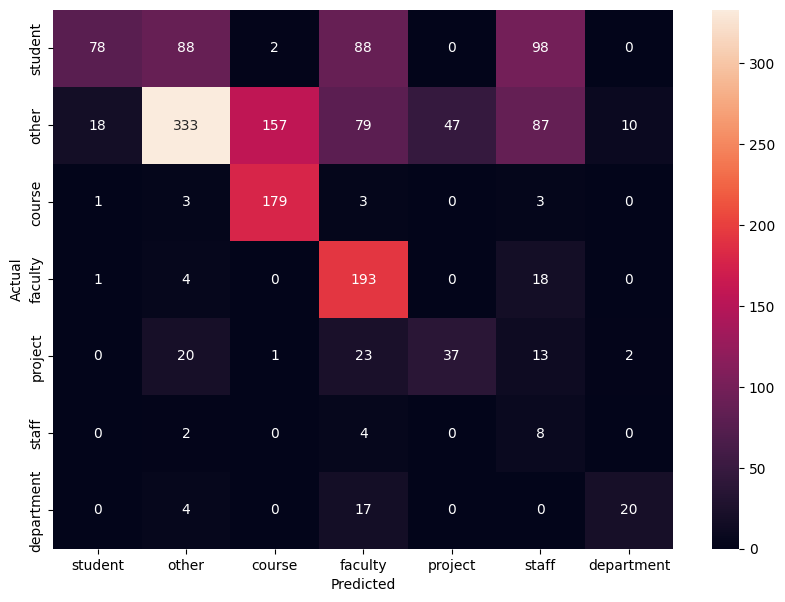

In [41]:
path_rag='./change_example/resultados_llm2_test_2_2.csv'
sub_df = pd.read_csv(path_rag)
# Paso 1: Extraer los nombres de archivo del sub-DataFrame
file_names = sub_df['file_name'].unique()
#print(file_names)
# Paso 2: Filtrar el DataFrame principal para estos nombres de archivo
df_filtrado = result[result['file_name'].isin(file_names)]
# Unir df_principal y sub_df en base a 'file_name'
nuevo_df = pd.merge(df_filtrado, sub_df, on='file_name', suffixes=('_principal', '_sub'))
# Asumiendo que las columnas de etiquetas se llaman 'true_label' y 'predicted_label'
y_true = nuevo_df['class_model1']
y_pred = nuevo_df['predicted_class']
print(len(y_true),len(y_pred))
# Calcular la precisión para cada clase
precisions = precision_score(y_true, y_pred, average=None,labels=class_names)  # None para obtener la precisión de cada clase
# Calcular la precisión media total
avg_precision = precision_score(y_true, y_pred, average='macro')  # 'macro' calcula la media sin ponderar
print(class_names)
print("Precisión por clase:", precisions)
print("Precisión media total:", avg_precision)

class_names=y_true.unique()
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

206 206
['student' 'other' 'course' 'faculty' 'project' 'staff' 'department']
Precisión por clase: [0.36       0.92857143 0.76923077 0.8        0.66666667 0.
 0.33333333]
Precisión media total: 0.5511145996860283


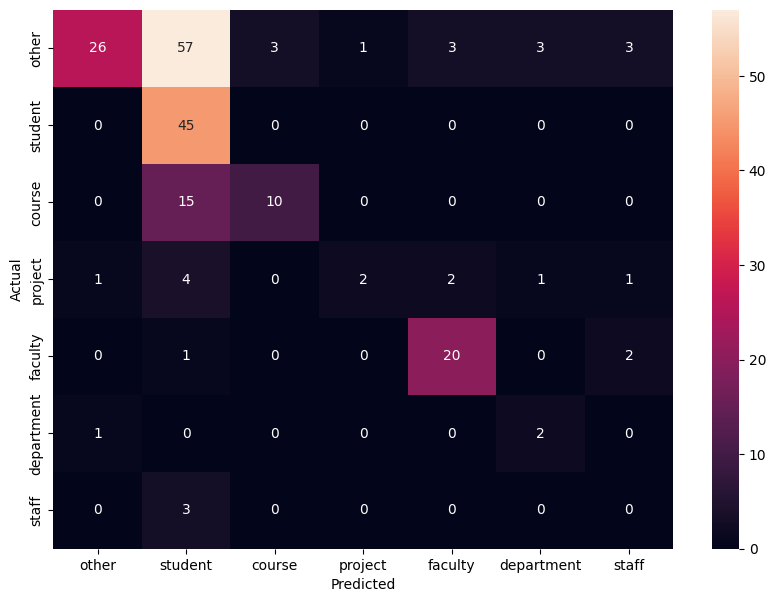

In [42]:
path_rag='./change_example/key_promt_new_promt_9_eval_staff_llama2-chat-ayb-13b.Q5_K_M_with_other.csv'
sub_df = pd.read_csv(path_rag)
# Paso 1: Extraer los nombres de archivo del sub-DataFrame
file_names = sub_df['file_name'].unique()
#print(file_names)
# Paso 2: Filtrar el DataFrame principal para estos nombres de archivo
df_filtrado = result[result['file_name'].isin(file_names)]
# Unir df_principal y sub_df en base a 'file_name'
nuevo_df = pd.merge(df_filtrado, sub_df, on='file_name', suffixes=('_principal', '_sub'))
# Asumiendo que las columnas de etiquetas se llaman 'true_label' y 'predicted_label'
y_true = nuevo_df['class_model1']
y_pred = nuevo_df['predicted_class']
print(len(y_true),len(y_pred))
# Calcular la precisión para cada clase
precisions = precision_score(y_true, y_pred, average=None,labels=class_names)  # None para obtener la precisión de cada clase
# Calcular la precisión media total
avg_precision = precision_score(y_true, y_pred, average='macro')  # 'macro' calcula la media sin ponderar
print(class_names)
print("Precisión por clase:", precisions)
print("Precisión media total:", avg_precision)

class_names=y_true.unique()
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

339 339
['other' 'student' 'course' 'project' 'faculty' 'department' 'staff']
Precisión por clase: [0.92307692 0.35820896 0.77272727 0.5        0.7826087  0.33333333
 0.        ]
Precisión media total: 0.5242793114305119


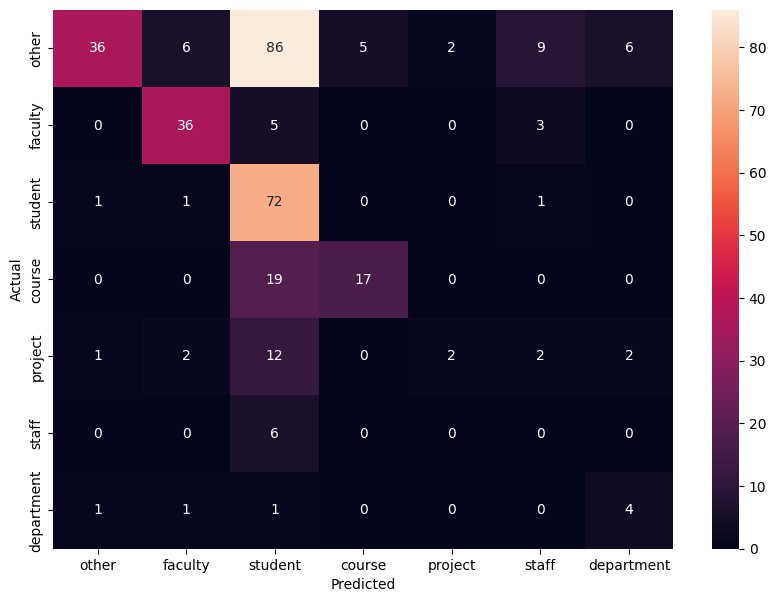

In [43]:
path_rag='./promt_9/key_promt_new_promt_9_eval_staff_llama2-chat-ayb-13b.Q5_K_M_with_other.csv'
sub_df = pd.read_csv(path_rag)
# Paso 1: Extraer los nombres de archivo del sub-DataFrame
file_names = sub_df['file_name'].unique()
#print(file_names)
# Paso 2: Filtrar el DataFrame principal para estos nombres de archivo
df_filtrado = result[result['file_name'].isin(file_names)]
# Unir df_principal y sub_df en base a 'file_name'
nuevo_df = pd.merge(df_filtrado, sub_df, on='file_name', suffixes=('_principal', '_sub'))
# Asumiendo que las columnas de etiquetas se llaman 'true_label' y 'predicted_label'
y_true = nuevo_df['class_model1']
y_pred = nuevo_df['predicted_class']
print(len(y_true),len(y_pred))
# Calcular la precisión para cada clase
precisions = precision_score(y_true, y_pred, average=None,labels=class_names)  # None para obtener la precisión de cada clase
# Calcular la precisión media total
avg_precision = precision_score(y_true, y_pred, average='macro')  # 'macro' calcula la media sin ponderar
print(class_names)
print("Precisión por clase:", precisions)
print("Precisión media total:", avg_precision)

class_names=y_true.unique()
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

100 100
['other' 'faculty' 'student' 'course' 'project' 'staff' 'department']
Precisión por clase: [0.64285714 0.5        0.5        0.65       0.18181818 0.
 0.5       ]
Precisión media total: 0.42495361781076063


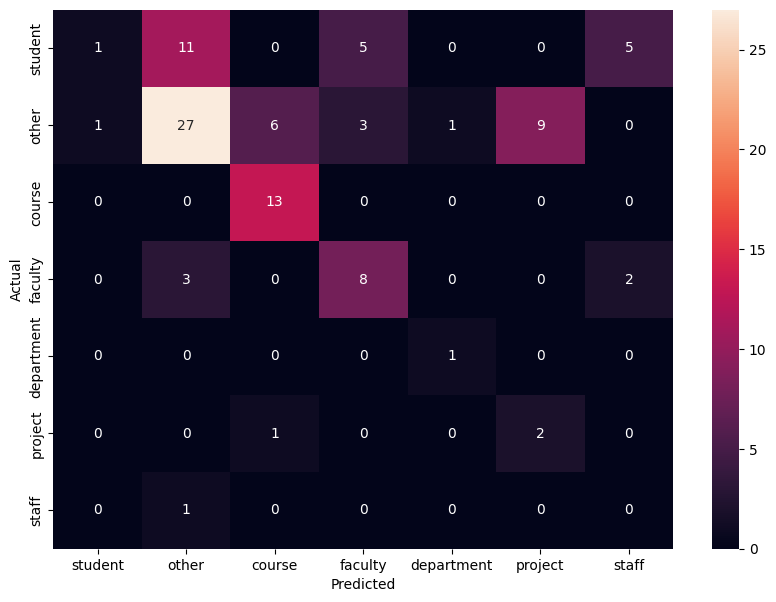

In [44]:
path_rag='./promt_4/resultados_llm2_test_promt_4_text_etiquetas_1024_llama2-chat-ayb-13b.Q5_K_M.csv'
sub_df = pd.read_csv(path_rag)
# Paso 1: Extraer los nombres de archivo del sub-DataFrame
file_names = sub_df['file_name'].unique()
#print(file_names)
# Paso 2: Filtrar el DataFrame principal para estos nombres de archivo
df_filtrado = result[result['file_name'].isin(file_names)]
# Unir df_principal y sub_df en base a 'file_name'
nuevo_df = pd.merge(df_filtrado, sub_df, on='file_name', suffixes=('_principal', '_sub'))
# Asumiendo que las columnas de etiquetas se llaman 'true_label' y 'predicted_label'
y_true = nuevo_df['class_model1']
y_pred = nuevo_df['predicted_class']
print(len(y_true),len(y_pred))
# Calcular la precisión para cada clase
precisions = precision_score(y_true, y_pred, average=None,labels=class_names)  # None para obtener la precisión de cada clase
# Calcular la precisión media total
avg_precision = precision_score(y_true, y_pred, average='macro')  # 'macro' calcula la media sin ponderar
print(class_names)
print("Precisión por clase:", precisions)
print("Precisión media total:", avg_precision)

class_names=y_true.unique()
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()